In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

In [2]:
f0 = 440
f1 = 7040
duration = 1
fs = 48000  
attenuation = -6

In [3]:
octave = np.log2(f1/f0)
notes = int(np.ceil(octave * 12))+1
temperament = 2 ** (1/12)
freqs = temperament ** np.linspace(0, notes-1, notes) * f0
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

In [4]:
def decay_envelope(decay, t):
    decibel = (10**(-decay/20))
    alpha = decibel ** (1/len(t))
    decay = alpha ** np.arange(1, len(t)+1)
    return decay

def cosine_decay_envelope(t):
    ticks = np.linspace(0, 1, len(t))
    decay = (np.cos(ticks * np.pi) + 1) * 0.5
    return decay

In [5]:
sine_waves = []
for freq in freqs:
    decay1 = decay_envelope(20, t)
    decay2 = cosine_decay_envelope(t)
    sine_wave = decay1 * decay2 * np.sin(2 * np.pi * freq * t)
    silence = np.zeros(12000)
    sine_waves.append(silence)
    sine_waves.append(sine_wave)
    sine_waves.append(silence)

final_wave = np.concatenate(sine_waves)

In [6]:
# stereo_L = np.column_stack((final_wave, np.zeros_like(final_wave))) * 10 ** (attenuation/20) 
# stereo_R = np.column_stack((np.zeros_like(final_wave), final_wave)) * 10 ** (attenuation/20)
# sf.write(f'{f0}Hz_{f1}Hz_{fs}_{duration}Sec_L.wav', stereo_L, fs)
# sf.write(f'{f0}Hz_{f1}Hz_{fs}_{duration}Sec_R.wav', stereo_R, fs)
sf.write(f'{f0}Hz_{f1}Hz_{fs}_{duration}Sec_mono.wav', final_wave * 10 ** (attenuation/20) , fs)
stereo = np.column_stack((final_wave, final_wave)) * 10 ** (attenuation/20) 
sf.write(f'{f0}Hz_{f1}Hz_{fs}_{duration}Sec.wav', stereo, fs)

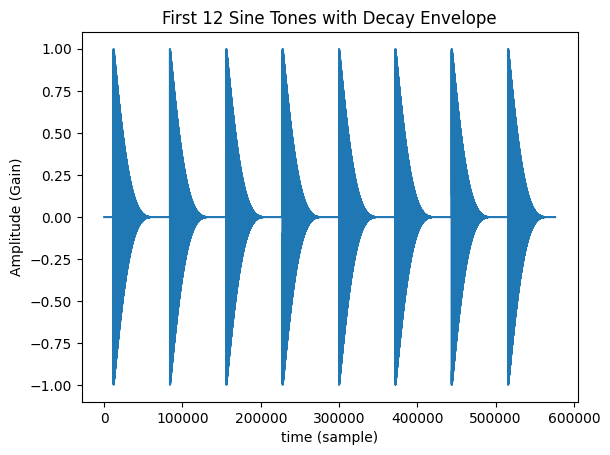

In [7]:
plt.plot(final_wave[:fs*12])
plt.xlabel('time (sample)')
plt.ylabel('Amplitude (Gain)')
plt.title('First 12 Sine Tones with Decay Envelope')
plt.show()